## Импорт данных

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
data=pd.read_csv("Репозиторий дыхания/0001_брюшное.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
data.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.058895,0.689,-1.453,4.417,0.881,-1.544,4.547,0.718,-1.607,4.369,0.000079
1,0.111889,0.687,-1.452,4.418,0.881,-1.544,4.547,0.715,-1.607,4.371,0.000275
2,0.158371,0.687,-1.451,4.419,0.881,-1.544,4.545,0.714,-1.607,4.371,0.000170
3,0.262516,0.685,-1.450,4.420,0.882,-1.544,4.541,0.711,-1.608,4.373,0.000071
4,0.295620,0.684,-1.449,4.420,0.883,-1.544,4.540,0.709,-1.607,4.370,0.000064


## Анализ существующих данных

In [200]:
actors=pd.read_csv("Репозиторий дыхания/actors.txt", names=['id','date_of_birth','gender','covid','date_of_diagnosis','date_of_recovery','lung_lesions','percentage_of_lesions'], sep='\t')
actors = actors.drop_duplicates()
actors.head()

,id,date_of_birth,gender,covid,date_of_diagnosis,date_of_recovery,lung_lesions,percentage_of_lesions
0,1,04.07.2003,M,No,00.00.0000,00.00.0000,No,0
5,2,07.09.2001,M,No,00.00.0000,00.00.0000,No,0
9,3,14.04.2003,M,No,00.00.0000,00.00.0000,No,0
13,4,24.11.2003,M,Yes,05.11.2021,19.11.2021,No,0
17,5,29.03.2003,M,No,00.00.0000,00.00.0000,No,0


## Визуализация

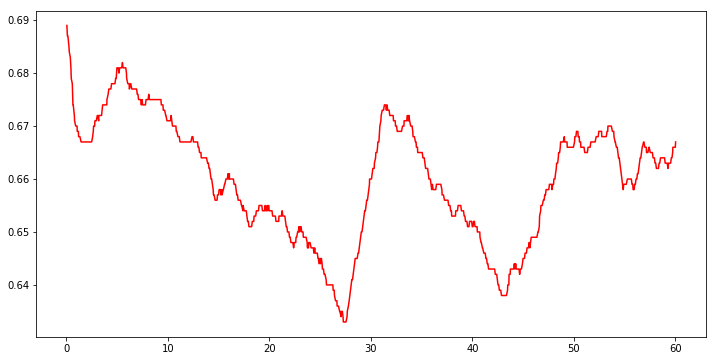

In [201]:
plt.figure(figsize=(12,6))
plt.plot(data['TimeStamp'], data['Marker 1 to X'], color='red')
plt.show()

In [202]:
# #Получим максимальное значение в столбце 'Marker 1 to X' - амплитуду
# maxX = data['Marker 1 to X'].max()
 
# # выведем результат на экран
# print(maxX)

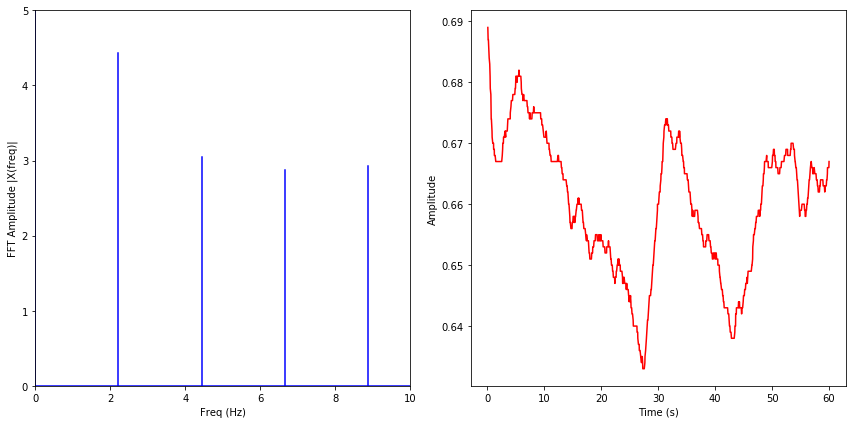

In [203]:
from numpy.fft import fft, ifft

x = data['Marker 1 to X']
t = data['TimeStamp']

X = fft(x)
N = len(X)
n = np.arange(N)
# sampling rate - Частота дискретизации
sr = 2000
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.ylim(0, 5)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [204]:
# Делим actors по полу
men = actors[actors['gender']=='M']
women = actors[actors['gender']=='F']
# Получаем id мужчин и женщин
id_men = men['id']
id_women = women['id']

In [205]:
import os
path = 'Репозиторий дыхания'
dirs = os.listdir(path)

## Делим файлы по типу дыхания

In [206]:
from pathlib import Path

def glob_re(path, regex="", glob_mask="**/*"):
    p = Path(path)
    res = [str(f) for f in p.glob(glob_mask) if re.search(regex, str(f))]
    return res

In [207]:
regex = fnmatch.translate('*брюшное*')
abdominal = glob_re(path, regex)

regex = fnmatch.translate('*грудное*')
chest = glob_re(path, regex)

regex = fnmatch.translate('*обычное*')
usual = glob_re(path, regex)

regex = fnmatch.translate('*смешанное*')
mixed = glob_re(path, regex)

## Анализ обычного дыхания женщин

In [208]:
women_usualBreathingList = []
for id in id_women:
#     pattern = '\*' + str(id) + '_\*'
    pattern = '*' + str(0) + str(id) + '_*'
    regex = fnmatch.translate(pattern)
    for entry in usual:
        result = re.match(regex, entry)
        if(result):
            women_usualBreathingList.append(entry)

In [209]:
# Отдельный файл со всеми данными об обычном дыхании
import fileinput
women_usualBreathingFile = 'women_usualBreathingFile.tsv'

with fileinput.FileInput(files=women_usualBreathingList) as fr, open(women_usualBreathingFile, 'w') as fw:
    for line in fr:
        if fr.isfirstline():
            file_name = fr.filename()
        fw.write(line)

In [210]:
women_usualBreathing=pd.read_csv("women_usualBreathingFile.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
women_usualBreathing.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.045410,0.413,-1.482,4.225,0.592,-1.660,4.284,0.374,-1.715,4.218,0.000000
1,0.078506,0.413,-1.481,4.221,0.592,-1.660,4.283,0.374,-1.715,4.217,0.000072
2,0.177799,0.413,-1.481,4.221,0.592,-1.661,4.283,0.374,-1.715,4.217,0.000046
3,0.241879,0.413,-1.481,4.222,0.591,-1.661,4.282,0.375,-1.715,4.218,0.000014
4,0.275200,0.412,-1.481,4.223,0.592,-1.660,4.283,0.375,-1.715,4.218,0.000012


In [211]:
#Получим расстояния по X от спинного маркера до грудного
distanceChestF_inUsual = women_usualBreathing
distanceChestF_inUsual.drop(['Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], axis=1, inplace=True)
distanceChestF_inUsual = distanceChestF_inUsual.assign(DistanceX = (distanceChestF_inUsual['Marker 3 to X'] - distanceChestF_inUsual['Marker 1 to X']).abs())

In [212]:
#Получим медианное расстояние по X от спинного маркера до грудного
distanceChestF_inUsual['DistanceX'].median()

0.024000000000000007

In [213]:
#Получим расстояния по X от спинного маркера до брюшного
distanceAbdominalF_inUsual = distanceChestF_inUsual
distanceAbdominalF_inUsual = distanceAbdominalF_inUsual.assign(DistanceX = (distanceAbdominalF_inUsual['Marker 3 to X'] - distanceAbdominalF_inUsual['Marker 2 to X']).abs())

In [214]:
#Получим медианное расстояние по X от спинного маркера маркера до брюшного
distanceAbdominalF_inUsual['DistanceX'].median()

0.14700000000000002

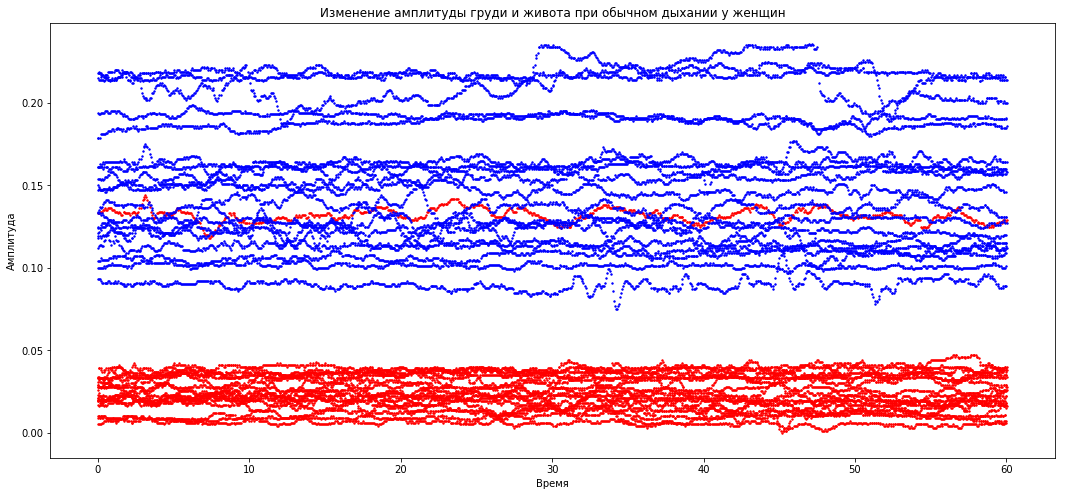

In [215]:
fig, ax = plt.subplots()
ax.scatter(distanceChestF_inUsual['TimeStamp'], distanceChestF_inUsual['DistanceX'], color='red', s=2)
ax.scatter(distanceAbdominalF_inUsual['TimeStamp'], distanceAbdominalF_inUsual['DistanceX'], color='blue', s=2)
plt.title('Изменение амплитуды груди и живота при обычном дыхании у женщин')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

fig.set_figwidth(18)
fig.set_figheight(8) 
plt.show()

## Анализ обычного дыхания мужчин

In [216]:
men_usualBreathingList = []
for id in id_men:
#     pattern = '\*' + str(id) + '_\*'
    pattern = '*' + str(0) + str(id) + '_*'
    regex = fnmatch.translate(pattern)
    for entry in usual:
        result = re.match(regex, entry)
        if(result):
            men_usualBreathingList.append(entry)

In [217]:
# Отдельный файл со всеми данными об обычном дыхании мужчин
men_usualBreathingFile = 'men_usualBreathingFile.tsv'

with fileinput.FileInput(files=men_usualBreathingList) as fr, open(men_usualBreathingFile, 'w') as fw:
    for line in fr:
        if fr.isfirstline():
            file_name = fr.filename()
        fw.write(line)

In [218]:
men_usualBreathing=pd.read_csv("men_usualBreathingFile.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
men_usualBreathing.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.042694,0.671,-1.446,4.374,0.886,-1.535,4.490,0.686,-1.615,4.322,0.000000
1,0.101616,0.669,-1.445,4.370,0.885,-1.536,4.489,0.686,-1.616,4.322,0.000058
2,0.147629,0.669,-1.446,4.370,0.884,-1.535,4.489,0.685,-1.616,4.321,0.000058
3,0.245777,0.669,-1.447,4.372,0.883,-1.536,4.488,0.685,-1.616,4.320,0.000028
4,0.275127,0.668,-1.448,4.375,0.882,-1.536,4.487,0.683,-1.616,4.318,-0.000029


In [219]:
#Получим расстояния по X от спинного маркера до грудного
distanceChestM_inUsual = men_usualBreathing
distanceChestM_inUsual.drop(['Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], axis=1, inplace=True)
distanceChestM_inUsual = distanceChestM_inUsual.assign(DistanceX = (distanceChestM_inUsual['Marker 3 to X'] - distanceChestM_inUsual['Marker 1 to X']).abs())

In [220]:
#Получим медианное расстояние по X от спинного маркера до грудного
distanceChestM_inUsual['DistanceX'].median()

0.023999999999999966

In [221]:
#Получим расстояния по X от спинного маркера до брюшного
distanceAbdominalM_inUsual = distanceChestM_inUsual
distanceAbdominalM_inUsual = distanceAbdominalM_inUsual.assign(DistanceX = (distanceAbdominalM_inUsual['Marker 3 to X'] - distanceAbdominalM_inUsual['Marker 2 to X']).abs())

In [222]:
#Получим медианное расстояние по X от спинного маркера маркера до брюшного
distanceAbdominalM_inChest['DistanceX'].median()

0.16099999999999992

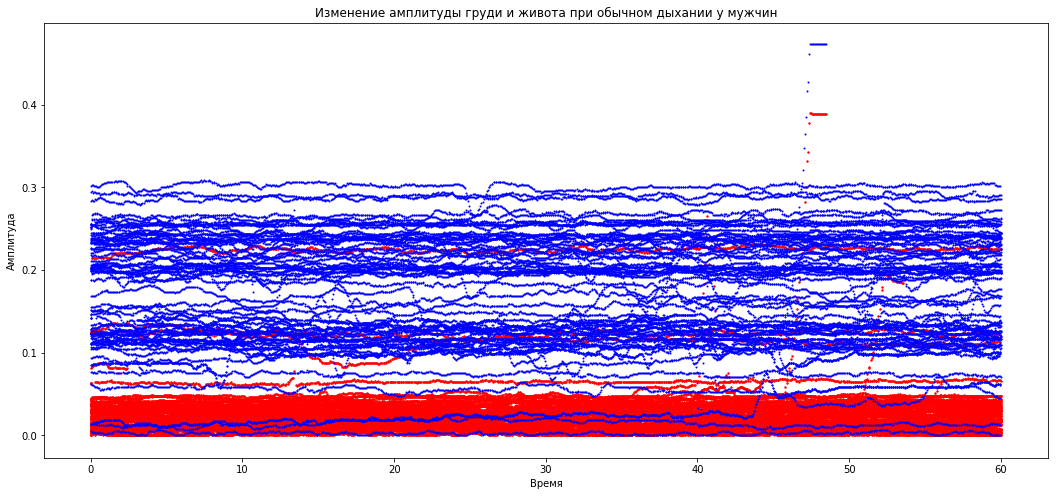

In [223]:
fig, ax = plt.subplots()
ax.scatter(distanceChestM_inUsual['TimeStamp'], distanceChestM_inUsual['DistanceX'], color='red', s=2)
ax.scatter(distanceAbdominalM_inUsual['TimeStamp'], distanceAbdominalM_inUsual['DistanceX'], color='blue', s=1)
plt.title('Изменение амплитуды груди и живота при обычном дыхании у мужчин')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

fig.set_figwidth(18)
fig.set_figheight(8) 
plt.show()

## Анализ грудного дыхания женщин

In [224]:
women_chestBreathingList = []
for id in id_women:
#     pattern = '\*' + str(id) + '_\*'
    pattern = '*' + str(0) + str(id) + '_*'
    regex = fnmatch.translate(pattern)
    for entry in chest:
        result = re.match(regex, entry)
        if(result):
            women_chestBreathingList.append(entry)

In [225]:
# Отдельный файл со всеми данными о грудном дыхании
import fileinput
women_chestBreathingFile = 'women_chestBreathingFile.tsv'

with fileinput.FileInput(files=women_chestBreathingList) as fr, open(women_chestBreathingFile, 'w') as fw:
    for line in fr:
        if fr.isfirstline():
            file_name = fr.filename()
        fw.write(line)

In [226]:
women_chestBreathing=pd.read_csv("women_chestBreathingFile.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
women_chestBreathing.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.022793,0.372,-1.464,4.236,0.550,-1.635,4.332,0.344,-1.703,4.233,0.000038
1,0.022793,0.372,-1.464,4.235,0.549,-1.635,4.332,0.344,-1.703,4.234,-0.000037
2,0.156235,0.373,-1.464,4.236,0.549,-1.635,4.332,0.344,-1.703,4.235,-0.000039
3,0.218662,0.373,-1.464,4.236,0.549,-1.635,4.332,0.345,-1.704,4.236,-0.000015
4,0.282215,0.372,-1.465,4.238,0.548,-1.636,4.331,0.344,-1.704,4.235,-0.000012


In [227]:
#Получим расстояния по X от спинного маркера до грудного
distanceChestF_inChest = women_chestBreathing
distanceChestF_inChest.drop(['Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], axis=1, inplace=True)
distanceChestF_inChest = distanceChestF_inChest.assign(DistanceX = (distanceChestF_inChest['Marker 3 to X'] - distanceChestF_inChest['Marker 1 to X']).abs())

In [228]:
#Получим медианное расстояние по X от спинного маркера до грудного
distanceChestF_inChest['DistanceX'].median()

0.020000000000000018

In [229]:
#Получим расстояния по X от спинного маркера до брюшного
distanceAbdominalF_inChest = distanceChestF_inChest
distanceAbdominalF_inChest = distanceAbdominalF_inChest.assign(DistanceX = (distanceChestF_inChest['Marker 3 to X'] - distanceChestF_inChest['Marker 2 to X']).abs())

In [230]:
#Получим медианное расстояние по X от спинного маркера маркера до брюшного
distanceAbdominalF_inChest['DistanceX'].median()

0.14300000000000002

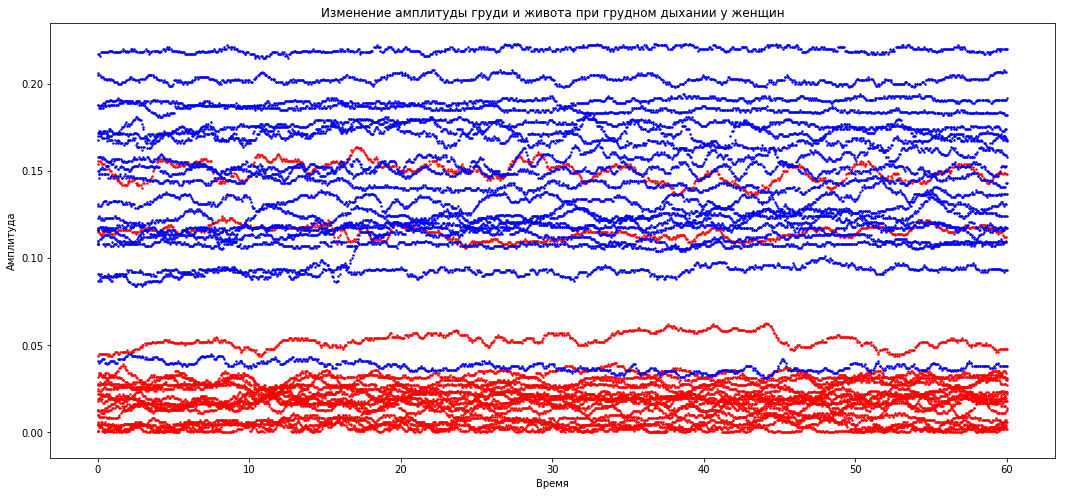

In [231]:
fig, ax = plt.subplots()
ax.scatter(distanceChestF_inChest['TimeStamp'], distanceChestF_inChest['DistanceX'], color='red', s=2)
ax.scatter(distanceAbdominalF_inChest['TimeStamp'], distanceAbdominalF_inChest['DistanceX'], color='blue', s=2)
plt.title('Изменение амплитуды груди и живота при грудном дыхании у женщин')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

fig.set_figwidth(18)
fig.set_figheight(8) 
plt.show()

## Анализ грудного дыхания мужчин

In [232]:
men_chestBreathingList = []
for id in id_men:
#     pattern = '\*' + str(id) + '_\*'
    pattern = '*' + str(0) + str(id) + '_*'
    regex = fnmatch.translate(pattern)
    for entry in chest:
        result = re.match(regex, entry)
        if(result):
            men_chestBreathingList.append(entry)

In [233]:
# Отдельный файл со всеми данными о грудном дыхании мужчин
men_chestBreathingFile = 'men_chestBreathingFile.tsv'

with fileinput.FileInput(files=men_chestBreathingList) as fr, open(men_chestBreathingFile, 'w') as fw:
    for line in fr:
        if fr.isfirstline():
            file_name = fr.filename()
        fw.write(line)

In [234]:
men_chestBreathing=pd.read_csv("men_chestBreathingFile.tsv", names=['TimeStamp','Marker 1 to X', 'Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to X', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to X', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], sep=' ')
men_chestBreathing.head()

,TimeStamp,Marker 1 to X,Marker 1 to Y,Marker 1 to Z,Marker 2 to X,Marker 2 to Y,Marker 2 to Z,Marker 3 to X,Marker 3 to Y,Marker 3 to Z,KVR
0,0.042397,0.690,-1.441,4.401,0.906,-1.534,4.504,0.705,-1.607,4.344,-1.081400e-07
1,0.104549,0.690,-1.443,4.400,0.907,-1.533,4.504,0.705,-1.607,4.346,-5.250900e-05
2,0.174202,0.689,-1.445,4.400,0.908,-1.532,4.504,0.706,-1.609,4.349,-1.768600e-04
3,0.236759,0.687,-1.445,4.399,0.907,-1.532,4.504,0.705,-1.610,4.349,-1.805800e-05
4,0.300713,0.685,-1.447,4.397,0.905,-1.532,4.503,0.704,-1.610,4.350,-9.132900e-06


In [235]:
#Получим расстояния по X от спинного маркера до грудного
distanceChestM_inChest = men_chestBreathing
distanceChestM_inChest.drop(['Marker 1 to Y', 'Marker 1 to Z', 'Marker 2 to Y', 'Marker 2 to Z', 'Marker 3 to Y', 'Marker 3 to Z', 'KVR'], axis=1, inplace=True)
distanceChestM_inChest = distanceChestM_inChest.assign(DistanceX = (distanceChestM_inChest['Marker 3 to X'] - distanceChestM_inChest['Marker 1 to X']).abs())

In [236]:
#Получим медианное расстояние по X от спинного маркера до грудного
distanceChestM_inChest['DistanceX'].median()

0.016000000000000014

In [237]:
#Получим расстояния по X от спинного маркера до брюшного
distanceAbdominalM_inChest = distanceChestM_inChest
distanceAbdominalM_inChest = distanceAbdominalM_inChest.assign(DistanceX = (distanceChestM_inChest['Marker 3 to X'] - distanceChestM_inChest['Marker 2 to X']).abs())

In [238]:
#Получим медианное расстояние по X от спинного маркера маркера до брюшного
distanceAbdominalM_inChest['DistanceX'].median()

0.16099999999999992

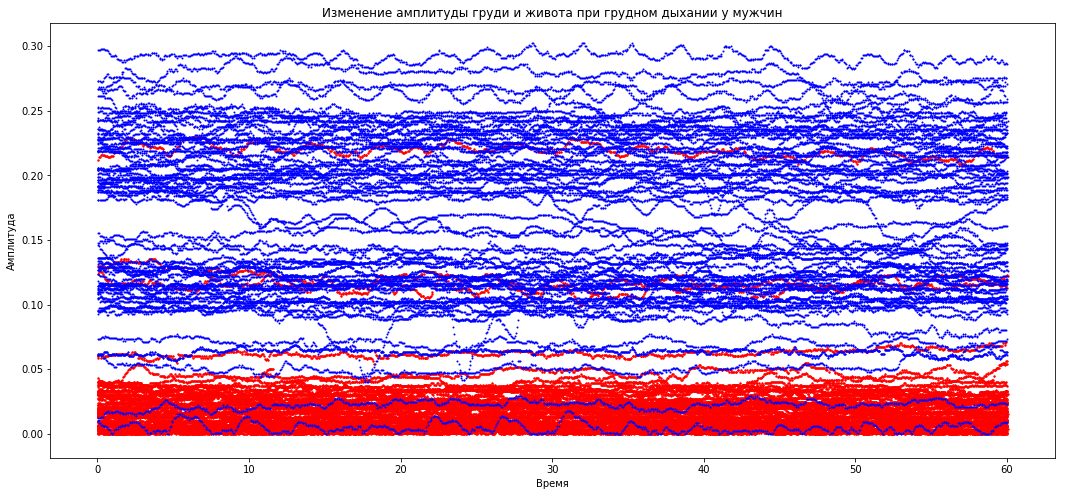

In [239]:
fig, ax = plt.subplots()
ax.scatter(distanceChestM_inChest['TimeStamp'], distanceChestM_inChest['DistanceX'], color='red', s=2)
ax.scatter(distanceAbdominalM_inChest['TimeStamp'], distanceAbdominalM_inChest['DistanceX'], color='blue', s=1)
plt.title('Изменение амплитуды груди и живота при грудном дыхании у мужчин')
plt.xlabel('Время')
plt.ylabel('Амплитуда')

fig.set_figwidth(18)
fig.set_figheight(8) 
plt.show()

## Анализ брюшного дыхания женщин